<img src = '../../sb_tight.png'>
<h1 align = 'center'> Capstone Project 2: Pump It Up </h1>

---

### Notebook 2: EDA (Exploratory Data Analysis)
**Author:<br>
Tashi T. Gurung**<br>
**hseb.tashi@gmail.com**

### About the project:
The **objective** of this project is to **predict the failure of water points** spread accross Tanzania before they occur.

50% of Tanzania's population do not have access to safe water. Among other sources, Tanzanians depend on water points mostly pumps (~60K) spread across Tanzania. Compared to other infrastructure projects, water point projects consist of a huge number of inspection points that are geographically spread out. Gathering data on the condition of these pumps has been a challenge. From working with local agencies, to implementing mobile based crowd sourcing projects, none have produced satisfactory results.

The lack of quality data creates a number of problem for a stakeholder like the Tanzanian Government, specifically the Ministry of Water. Consequences include not only higher maintainence costs, but also all the problems and nuanced issues faced by communities when their access to water is compromised or threatened.

While better data collection infrastructure should be built overtime, this project (with its model(s), various analysis, and insights) will be key for efficient resource allocation to maximize the number of people and communities with access to water.
In the long run, it will assist stake holders in and project planning, and even local, regional and national level policy formation. 

### About the notebook:
We imported the dataset produced by the '1.Data Wrangling.ipynb' notebook.\
We will perform EDA to better understand the data.\
To look at the relationship between variables.\
We will also take a closer look at missing values including spotting patterns.

---

# Import libraries and datasets

In [77]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv('../data/interim/df.csv')

In [79]:
data = df.copy()

---

Some categorical variables have datatype int.\
Let us convert them to their correct datatype i.e. string

In [80]:
# convert datatype of cols from int to str
cols = ['id','region_code','district_code',]
for col in cols:
    data[col] = data[col].astype('str')

---

In [81]:
data.dtypes.value_counts()

object     34
int64       3
float64     3
dtype: int64

Now we have 33 categorical variables excluding target variable, but only\
6 numeric variables\
Hence, let us start our EDA with categorical variables

---

### EDA: Categorical Variables

Primary Resource Consulted for this portion of EDA:\
Medium/Analytics Vidhya\
https://medium.com/analytics-vidhya/tutorial-exploratory-data-analysis-eda-with-categorical-variables-6a569a3aea55

In [82]:
data_cat = data.select_dtypes(include=object)

# CONCAT 
# -> first row, and 
# -> nunique() of each column

pd.concat([data_cat.iloc[0].T,data_cat.nunique(), data_cat.isna().sum()/len(data_cat)], 
          axis = 1, 
          keys = ['e.g. row1','nunique()', 'missing_value %'])

,e.g. row1,nunique(),missing_value %
id,69572,59400,0.000000
date_recorded,2011-03-14,356,0.000000
funder,Roman,1897,0.061195
installer,Roman,2145,0.061532
wpt_name,none,37400,0.000000
basin,Lake Nyasa,9,0.000000
subvillage,Mnyusi B,19287,0.006246
region,Iringa,21,0.000000
region_code,11,27,0.000000
district_code,5,20,0.000000


---

For EDA's that follow, let us temporarity convert the target_variable to a numeric datatype with 2 classes instead of 3

In [83]:
data['target_var'] = data['target_var'].map({'functional':1,'non functional':0, 'functional needs repair':0})

---

Let us now start looking at individual features.\
and their relationship to the target_variable

---

column: **funder**

In [84]:
data['funder'].value_counts()/len(df)

Government Of Tanzania         0.152929
Danida                         0.052424
Hesawa                         0.037071
Rwssp                          0.023131
World Bank                     0.022710
                                 ...   
Manyota Primary School         0.000017
Magige                         0.000017
Pema                           0.000017
Mzee Shindika                  0.000017
Abc-ihushi Development Cent    0.000017
Name: funder, Length: 1897, dtype: float64

Let us create a new feature called 'funder_bool' where if funder  is 'Government of Tanzania' or 'Ministry of Water', value = 'govt', else 'non-govt'

In [85]:
data['funder_bool'] = np.where(data['funder'].isin(['Government Of Tanzania','Ministry Of Water']), 'govt', 'non-govt')

In [86]:
s = data.groupby('funder_bool')['target_var'].mean()
s

funder_bool
govt        0.404383
non-govt    0.570064
Name: target_var, dtype: float64

In [87]:
s['non-govt']/s['govt']

1.4097133580363954

Observation: Water pumps funded by the any other organization or agent is ~41% more likely to be functional vs non functional or needs repair

---

column: **installer**

In [88]:
data['installer'].value_counts()/len(df)

DWE                  0.292963
Government           0.030724
RWE                  0.020303
Commu                0.017845
DANIDA               0.017677
                       ...   
LIZAD                0.000017
Cathoric             0.000017
TINA/Africare        0.000017
JSICA                0.000017
Igolola community    0.000017
Name: installer, Length: 2145, dtype: float64

In [89]:
data['installer_bool'] = np.where(data['installer'] == 'DWE', 'DWE', 'Non-DWE')

In [90]:
s = data.groupby('installer_bool')['target_var'].mean()
s

installer_bool
DWE        0.542064
Non-DWE    0.543502
Name: target_var, dtype: float64

In [91]:
s['DWE']/s['Non-DWE']

0.9973543045319602

Observation: Whether water pumps are installed by DWE or Non-DWE has no correlation with it's status

---

column: **basin**

basin has low cardinality, hence we don't have to convert it into a boolean

In [92]:
round(data.groupby('basin')['target_var'].mean().sort_values(),2)

basin
Ruvuma / Southern Coast    0.37
Lake Rukwa                 0.41
Lake Tanganyika            0.48
Lake Victoria              0.50
Wami / Ruvu                0.52
Internal                   0.58
Pangani                    0.60
Rufiji                     0.64
Lake Nyasa                 0.65
Name: target_var, dtype: float64

Observation: There seems to be some difference in the status of water pumps\
Questions: Are there confounding variables?

---

column: **region** and column: **region_code**

In [93]:
print(data['region'].nunique(), data['region_code'].nunique())

21 27


In [94]:
data.groupby('region')['region_code'].unique()

region
Arusha                [2, 24]
Dar es Salaam             [7]
Dodoma                    [1]
Iringa                   [11]
Kagera                   [18]
Kigoma                   [16]
Kilimanjaro               [3]
Lindi             [80, 18, 8]
Manyara                  [21]
Mara                     [20]
Mbeya                    [12]
Morogoro                  [5]
Mtwara            [90, 99, 9]
Mwanza               [19, 17]
Pwani             [60, 6, 40]
Rukwa                    [15]
Ruvuma                   [10]
Shinyanga        [17, 14, 11]
Singida                  [13]
Tabora                   [14]
Tanga                  [4, 5]
Name: region_code, dtype: object

In [95]:
# what conclusion can we reach here?
# Shoudln't each region have exacty 1 region_code?
# Why should this matter?
# -> Can we not just use feature: region and discard feature: region_code altogether?

---

column: **lga**\
lga: Geographic Location

In [96]:
data['lga'].value_counts()

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64

Note: Potential Feature Engineering opportunity.
Hypothesis: The difference in the likelihood that a water pump is functional between that of rural and urban area is statistically significant.

In [97]:
round(data['lga'].str.title().str.contains('Rural').sum()/len(data),2)

0.16

In [98]:
round(data['lga'].str.title().str.contains('Urban').sum()/len(data),2)

0.03

Conclustion: data points containing 'Rural', or 'Urban' only consists of ~19% of the data. Hence, we cannot proceed with this approach.

---

column: **public_meeting**

In [99]:
data['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [100]:
data.groupby('public_meeting')['target_var'].mean()

public_meeting
False    0.429871
True     0.556899
Name: target_var, dtype: float64

What conclusion can we derive from the above?\
Or atleast, what information can we gain?\

---

column: **scheme_management**

In [101]:
data['scheme_management'].value_counts()/len(data)

VWC                 0.619411
WUG                 0.087643
Water authority     0.053081
WUA                 0.048535
Water Board         0.046263
Parastatal          0.028283
Private operator    0.017896
Company             0.017862
Other               0.012896
SWC                 0.001633
Trust               0.001212
None                0.000017
Name: scheme_management, dtype: float64

In [102]:
data['scheme_management_bool'] = np.where(data['scheme_management'] == 'VWC', 'VWC', 'Non-VWC')

In [103]:
s = data.groupby('scheme_management_bool')['target_var'].mean()
s

scheme_management_bool
Non-VWC    0.588269
VWC        0.515315
Name: target_var, dtype: float64

In [104]:
s['Non-VWC']/s['VWC']

1.1415709777916887

---
---
---

## EDA: Numeric Variables

Population

In [105]:
data['population'].describe()

count    59400.000000
mean       179.909983
std        471.482176
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64

In [106]:
round(data['population'].value_counts(normalize = True).sort_index(),2)

0        0.36
1        0.12
2        0.00
3        0.00
4        0.00
         ... 
9865     0.00
10000    0.00
11463    0.00
15300    0.00
30500    0.00
Name: population, Length: 1049, dtype: float64

~48% of the data is 0 or 1 for population

In [107]:
data[data['population'].isin([0,1])]['target_var'].value_counts(normalize = True)

0    0.500634
1    0.499366
Name: target_var, dtype: float64

To apply **qcut** we can't have a value occuring so often

drop 48% of the data with population == 0 or 1

In [113]:
data_inhabitated = data[~data['population'].isin([0,1])].copy()

Let us check again if any of the values occur very frequently

In [128]:
data_inhabitated['population'].value_counts(normalize = True).sort_values(ascending = False)

200     0.062593
150     0.061044
250     0.054236
300     0.047622
100     0.036975
          ...   
2395    0.000032
571     0.000032
1619    0.000032
619     0.000032
1863    0.000032
Name: population, Length: 1047, dtype: float64

We can see that the value that appears the most is 200 which is ~6.3% of the time.\
We should be able to move forward with this now.

Let us now bin the population column into the maximum amount of binning possible.\
Since 100/15 is 6.67 which is still higher than ~6.3%, we can select 15 to be the number of bins.

In [133]:
data_inhabitated['population_binned'] = pd.qcut(data_inhabitated['population'],
                                                q = 15) # 19 is the max without error

In [142]:
len(data_inhabitated)/15

2066.266666666667

In [143]:
(data_inhabitated['population'] == 35).sum()

245

In [144]:
data_inhabitated['population_binned'].value_counts().sort_index()

(1.999, 35.0]       2304
(35.0, 50.0]        2060
(50.0, 75.0]        1964
(75.0, 100.0]       2564
(100.0, 130.0]      1671
(130.0, 150.0]      2344
(150.0, 200.0]      2862
(200.0, 230.0]       996
(230.0, 250.0]      2080
(250.0, 300.0]      2247
(300.0, 350.0]      1662
(350.0, 450.0]      2283
(450.0, 557.2]      1824
(557.2, 840.0]      2081
(840.0, 30500.0]    2052
Name: population_binned, dtype: int64

In [145]:
2304-245

2059

In [126]:
_ = data_inhabitated.groupby('population_binned')['target_var'].mean()
_.sort_values()

population_binned
(223.0, 250.0]       0.477866
(250.0, 290.0]       0.491108
(317.0, 358.0]       0.499388
(500.0, 634.0]       0.508772
(430.0, 500.0]       0.518753
(150.0, 157.0]       0.520833
(358.0, 430.0]       0.521127
(200.0, 223.0]       0.523810
(290.0, 317.0]       0.531288
(634.0, 1000.0]      0.572511
(157.0, 200.0]       0.579838
(100.0, 120.0]       0.591297
(1000.0, 30500.0]    0.597025
(80.0, 100.0]        0.599694
(120.0, 150.0]       0.605346
(50.0, 60.0]         0.634061
(30.0, 50.0]         0.679761
(60.0, 80.0]         0.693390
(1.0, 30.0]          0.772997
Name: target_var, dtype: float64

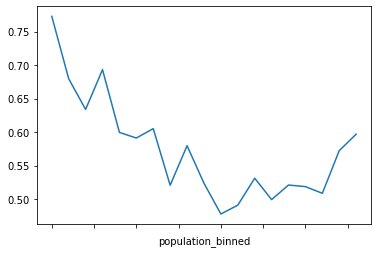

In [76]:
_.plot();

*population_binned* and the *likelihood of a pump being functional* has a **quadratic** relationship, with a concave up lineplot

---

Another approach to bin population **cut**

In [148]:
df['population'].min()

0

In [149]:
pd.cut(df['population'],
       bins = 10,).unique()

[(-30.5, 3050.0], (3050.0, 6100.0], (6100.0, 9150.0], (9150.0, 12200.0], (15250.0, 18300.0], (27450.0, 30500.0]]
Categories (6, interval[float64]): [(-30.5, 3050.0] < (3050.0, 6100.0] < (6100.0, 9150.0] < (9150.0, 12200.0] < (15250.0, 18300.0] < (27450.0, 30500.0]]

In [150]:
pd.cut(df['population'],
       bins = 10,).value_counts(normalize = True)

(-30.5, 3050.0]       0.995842
(3050.0, 6100.0]      0.003013
(6100.0, 9150.0]      0.001010
(9150.0, 12200.0]     0.000101
(27450.0, 30500.0]    0.000017
(15250.0, 18300.0]    0.000017
(24400.0, 27450.0]    0.000000
(21350.0, 24400.0]    0.000000
(18300.0, 21350.0]    0.000000
(12200.0, 15250.0]    0.000000
Name: population, dtype: float64

99% of the data lie in one class

In [152]:
pd.cut(df[df['population']<3050]['population'],
       bins = 10,).value_counts(normalize = True)

(-3.031, 303.1]     0.837064
(303.1, 606.2]      0.109498
(606.2, 909.3]      0.026812
(909.3, 1212.4]     0.011614
(1212.4, 1515.5]    0.006340
(1818.6, 2121.7]    0.003178
(1515.5, 1818.6]    0.001927
(2424.8, 2727.9]    0.001623
(2727.9, 3031.0]    0.001031
(2121.7, 2424.8]    0.000913
Name: population, dtype: float64

~ 84% of the data lie in one class\
~ 94% of the data in two classes

Should I consider log transformation here? and perhaps potentially bin afterwards, if necessary?

In [153]:
pd.cut(df[df[['population']<606]['population'],
       bins = 10,).value_counts(normalize = True)

(-0.605, 60.5]    0.605755
(60.5, 121.0]     0.081428
(242.0, 302.5]    0.071962
(121.0, 181.5]    0.063281
(181.5, 242.0]    0.061870
(302.5, 363.0]    0.035222
(484.0, 544.5]    0.025773
(363.0, 423.5]    0.023648
(423.5, 484.0]    0.015914
(544.5, 605.0]    0.015146
Name: population, dtype: float64

This is because 0 constitutes of most of the values

If we were to treat 0s as missing values and impute it?

In [156]:
pd.cut(df[(df['population']<606) & \
          (df['population']>0)]\
       ['population'],
       bins = 10,).value_counts(normalize = True)

(0.396, 61.4]     0.362297
(61.4, 121.8]     0.131621
(242.6, 303.0]    0.116537
(121.8, 182.2]    0.102696
(182.2, 242.6]    0.099778
(303.0, 363.4]    0.056867
(484.2, 544.6]    0.041697
(363.4, 423.8]    0.038258
(423.8, 484.2]    0.025746
(544.6, 605.0]    0.024504
Name: population, dtype: float64

even when we exclude observations with population = 0, a significant amount of observations (~ 36%) still fall under one category

Decision:
1) Treat 0s as missing value\
2) Log transforation\
3) Binning: depending on the situation

---

column: **latitude**, and \
column: **longtitude**

Most northern i.e. the highest latitude is 00 59'S ^\
Most southern i.e. the lowest latitude is 11 45'S v\
\
Most eastern 40 29'E <\
Mose western  29 10'E  >\
\
source: https://worldpopulationreview.com/country-locations/where-is-tanzania

In [267]:
print(df['latitude'].min(), df['latitude'].max())

-11.64944018 -2e-08


In [268]:
print(df['longitude'].min(), df['longitude'].max())

0.0 40.34519307


The westernmost point for Tanzania is 20 10'E\
Hence, all values for longitude lower than 20.10 is invalid data

In [269]:
df[df['longitude']< 20.10]['longitude'].value_counts()/len(df)

0.0    0.030505
Name: longitude, dtype: float64

Quite unsurprisingly, the only value less than 20.10 for longitude is 0.\
We can hence make a reasonable assumption that the values of 0.0 for column: **longitude** represent missing values.

In [274]:
df[df['longitude']== 0.0]['latitude'].value_counts()

-2.000000e-08    1812
Name: latitude, dtype: int64

In [278]:
df[df['longitude']== 0.0]['population'].value_counts()

0    1812
Name: population, dtype: int64

In [ ]:
df[df['longitude']== 0.0]['population'].value_counts()

In [279]:
df[df['longitude']== 0.0]['target_var'].value_counts()

functional                 870
non functional             556
functional needs repair    386
Name: target_var, dtype: int64

geography

In [280]:
df[df['longitude']== 0.0]['region'].value_counts()

Shinyanga    1005
Mwanza        807
Name: region, dtype: int64

In [281]:
df[df['longitude']== 0.0]['basin'].value_counts()

Lake Victoria      1713
Lake Tanganyika      99
Name: basin, dtype: int64

In [290]:
df[df['longitude']== 0.0]['district_code'].value_counts()

1    1057
6     488
2     264
4       3
Name: district_code, dtype: int64

In [315]:
district_code = '4'

m   = df[(df['district_code'] == district_code) &
       (df['longitude'] != 0)]\
        ['longitude'].mean()
std = df[(df['district_code'] == district_code) &
         (df['longitude'] != 0)]\
        ['longitude'].std()

print(m, std)

35.01968034994101 2.055237091070566


2.055237091070566

We can assign the missing longitude to be the mean of district_code it belongs to